<a href="https://colab.research.google.com/github/ssbyrne89/DS-Unit-1-Sprint-2-Statistics/blob/master/Sean_HW_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

from scipy.stats import ttest_ind, ttest_1samp, t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'


In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [4]:
hv = pd.read_csv(url,
                 header=None,
                 names=column_headers,
                 na_values="?")
print(hv.shape)
hv.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
hv = hv.replace({"y":1, "n": 0})
dem = hv[hv['party']=='democrat']
rep = hv[hv['party']=='republican']

In [0]:
import scipy.stats as stats
import seaborn as sns

In [7]:
dem_con_in=stats.t.interval(0.95, 
                          dem.shape[0],
                          loc = dem['immigration'].mean(),
                          scale = (np.std(dem['immigration'],
                                          ddof = 1))/dem.shape[0]**0.5)
dem_con_in

(0.41121926619146887, 0.5317465132762117)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


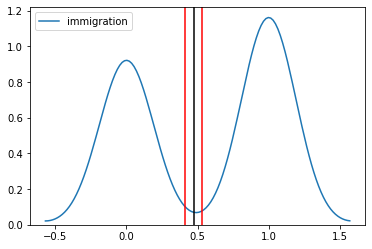

In [8]:
sns.kdeplot(rep['immigration'])
plt.axvline(x=dem_con_in[0], color='r')
plt.axvline(x=dem_con_in[1], color='r')
plt.axvline(x=dem['immigration'].mean(), color='k');

In [0]:
#### regarding immigration and how republicans and democrats differ,
####  the graph and confidence levels indicate that while dem and rep vote similarly,
#### it appears that dems would be more inclined to vote no because the mean and
#### confidence interval are closer to zero
####

In [10]:
rep_con_in=stats.t.interval(0.95, 
                          rep.shape[0],
                          loc = rep['immigration'].mean(),
                          scale = (np.std(rep['immigration'],
                                          ddof = 1))/rep.shape[0]**0.5)
rep_con_in

(0.4816962163276252, 0.63345529882389)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


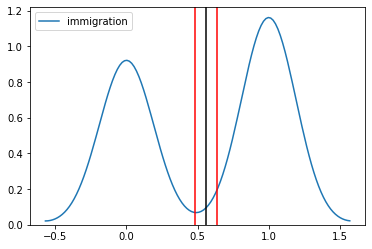

In [11]:
sns.kdeplot(rep['immigration'])
plt.axvline(x=rep_con_in[0], color='r')
plt.axvline(x=rep_con_in[1], color='r')
plt.axvline(x=rep['immigration'].mean(), color='k');

In [12]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [0]:
iris_cn = ['sepal length in cm', 'sepal width in cm',
                  'petal length in cm', 'petal width in cm', 'class']
iris = pd.read_csv(iris_url, header=None, names=iris_cn)


In [14]:
iris.sample(7)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
32,5.2,4.1,1.5,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica


In [15]:
ct_iris = pd.crosstab(iris['class'], iris['petal length in cm'], margins=True)
print(ct_iris.shape)
ct_iris

(4, 44)


petal length in cm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9,All
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,1,1,2,7,12,14,7,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50
Iris-versicolor,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,3,5,3,4,2,4,7,3,5,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50
Iris-virginica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,3,3,7,2,2,2,3,6,3,3,2,2,3,1,1,1,2,1,50
All,1,1,2,7,12,14,7,4,2,1,2,2,1,1,1,3,5,3,4,2,4,8,3,5,4,5,4,8,2,2,2,3,6,3,3,2,2,3,1,1,1,2,1,150


In [27]:
row_sums = ct_iris.iloc[0:3, 43].values
col_sums = ct_iris.iloc[3, 0:43].values

print(row_sums)
print(col_sums)

[50 50 50]
[ 1  1  2  7 12 14  7  4  2  1  2  2  1  1  1  3  5  3  4  2  4  8  3  5
  4  5  4  8  2  2  2  3  6  3  3  2  2  3  1  1  1  2  1]


In [21]:
total = ct_iris.loc['All','All']
total

150

In [24]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(3, 43)
[[0.33333333 0.33333333 0.66666667 2.33333333 4.         4.66666667
  2.33333333 1.33333333 0.66666667 0.33333333 0.66666667 0.66666667
  0.33333333 0.33333333 0.33333333 1.         1.66666667 1.
  1.33333333 0.66666667 1.33333333 2.66666667 1.         1.66666667
  1.33333333 1.66666667 1.33333333 2.66666667 0.66666667 0.66666667
  0.66666667 1.         2.         1.         1.         0.66666667
  0.66666667 1.         0.33333333 0.33333333 0.33333333 0.66666667
  0.33333333]
 [0.33333333 0.33333333 0.66666667 2.33333333 4.         4.66666667
  2.33333333 1.33333333 0.66666667 0.33333333 0.66666667 0.66666667
  0.33333333 0.33333333 0.33333333 1.         1.66666667 1.
  1.33333333 0.66666667 1.33333333 2.66666667 1.         1.66666667
  1.33333333 1.66666667 1.33333333 2.66666667 0.66666667 0.66666667
  0.66666667 1.         2.         1.         1.         0.66666667
  0.66666667 1.         0.33333333 0.33333333 0.33333333 0.66666667
  0.33333333]
 [0.33333333 0.33333333 0.66

In [25]:
observed = pd.crosstab(iris['class'], iris['petal length in cm']).values
print(observed.shape)
observed

(3, 43)


array([[ 1,  1,  2,  7, 12, 14,  7,  4,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  2,  1,  1,  1,  3,
         5,  3,  4,  2,  4,  7,  3,  5,  2,  2,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  2,  3,  3,  7,  2,  2,  2,  3,
         6,  3,  3,  2,  2,  3,  1,  1,  1,  2,  1]])

In [28]:
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 271.79999999999995


In [29]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 84


In [31]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 271.79999999999995


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)